In [100]:
import cv2 as cv
def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """
    
    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape
    
    rotation_mat = cv.getRotationMatrix2D(image_center, angle, 1.)
    
    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])
    
    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)
    
    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]
    
    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat

In [147]:
#This script matches jpgs from the atl_jpg and chirop_jpg folders.
#The width of the chiroptera lidar is about 490 meters.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#Applying rotations yields nothing.

b1 =  0
b2 = b1 + 4
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

meth = 'cv.TM_CCOEFF_NORMED'
method = eval(meth)

chirop_path = f'../make_image/chirop_jpg_norm_resized/chirop_{b1}_{b2}.jpg'
img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)

l = []
#For angles -5 to 5 with 0.5 degree step, compare images and output max values.
atl_path = f'../make_image/atlnr_rotate/atl_{b1}_{b2}_rot_{i}.jpg'
template = cv.imread(atl_path, cv.IMREAD_GRAYSCALE)
# Apply template matching
#print(template.shape)
#print(template.shape)
res = cv.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
print(f'loc: {max_loc} val: {max_val}')
# l.append([i, max_val])
# l = np.array(l)
# max_idx = np.argmax(l[:,1])
# print(f'best corr for {b1}-{b2}: {l[max_idx,:]}')
img2 = cv.flip(img, -1)
# plt.plot(l[:,1])
# plt.subplot(121)
# plt.imshow(res,cmap = 'gray')
# plt.subplot(122),plt.imshow(img2,cmap = 'gray')
# plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
# plt.suptitle(meth)

# plt.title(f'Best CCOEFF_NORM score for rotations')
# plt.show()


loc: (139, 2003) val: 0.12787820398807526


In [90]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


l = []

for i in range(0,8):
    b1 = i * 4
    b2 = b1 + 4

    atl_path = f'../make_image/atl_jpg_norm_resized/atl_{b1}_{b2}.jpg'
    chirop_path = f'../make_image/chirop_jpg_norm_resized/chirop_{b1}_{b2}.jpg'

    img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    img2 = img.copy()
    template = cv.imread(atl_path, cv.IMREAD_GRAYSCALE)
    assert template is not None, "file could not be read, check with os.path.exists()"
    w, h = template.shape[::-1]
    
    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
     'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    
    meth = 'cv.TM_CCORR'
    method = eval(meth)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    # Apply template Matching
    #print(img.shape)
    #print(template.shape)
    res = cv.matchTemplate(img,template,eval(meth))
    #print(res.shape)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    # plt.subplot(121),plt.imshow(res,cmap = 'gray')
    # plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # plt.subplot(122),plt.imshow(img,cmap = 'gray')
    # plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    # plt.suptitle(meth)
    l.append(top_left)

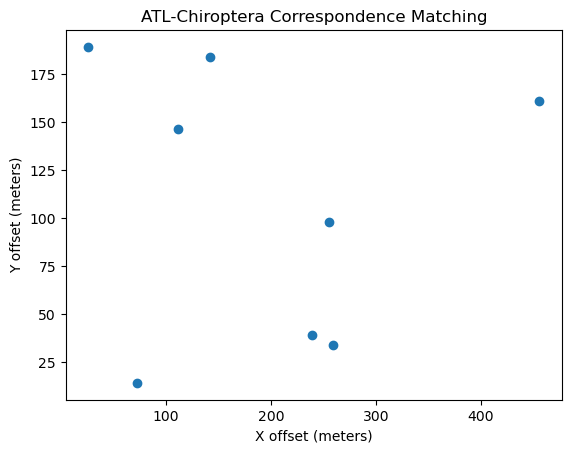

In [91]:
l = np.array(l)
x = l[:,0]
y = l[:,1]

plt.title('ATL-Chiroptera Correspondence Matching')
plt.xlabel('X offset (meters)')
plt.ylabel('Y offset (meters)')
plt.scatter(x,y)
plt.show()